# Supervised Learning: Binary Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
np.random.seed(42)

In [2]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
mpg['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [5]:
mpg['import'] = np.where(mpg['origin'] == 'usa', 1, 0)
mpg.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,import
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,1


In [7]:
mpg.shape[0]

398

In [6]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
import          0
dtype: int64

In [60]:
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
import            int64
dtype: object

In [8]:
mpg.dropna(how ='any', inplace = True)

In [9]:
mpg.shape[0]

392

Features?

In [10]:
features = mpg[[col for col in mpg if col not in ['origin', 'name', 'import']]].reset_index(drop = True)
features.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


Target?

In [11]:
target = mpg[['import']]
target.head()

,import
0,1
1,1
2,1
3,1
4,1


## Review: Collinearity

- **Collinearity** is when one feature variable in a regression model is highly linearly correleated with another feature variable

- when two columns are highly coolinear, removing one that does not affect results

In [12]:
corr_matrix = features.corr().abs()
corr_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,0.777618,0.805127,0.778427,0.832244,0.423329,0.580541
cylinders,0.777618,1.000000,0.950823,0.842983,0.897527,0.504683,0.345647
displacement,0.805127,0.950823,1.000000,0.897257,0.932994,0.543800,0.369855
horsepower,0.778427,0.842983,0.897257,1.000000,0.864538,0.689196,0.416361
weight,0.832244,0.897527,0.932994,0.864538,1.000000,0.416839,0.309120
acceleration,0.423329,0.504683,0.543800,0.689196,0.416839,1.000000,0.290316
model_year,0.580541,0.345647,0.369855,0.416361,0.309120,0.290316,1.000000


## Review: `scatter_matrix`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1237ab3d0>,
      dtype=object)

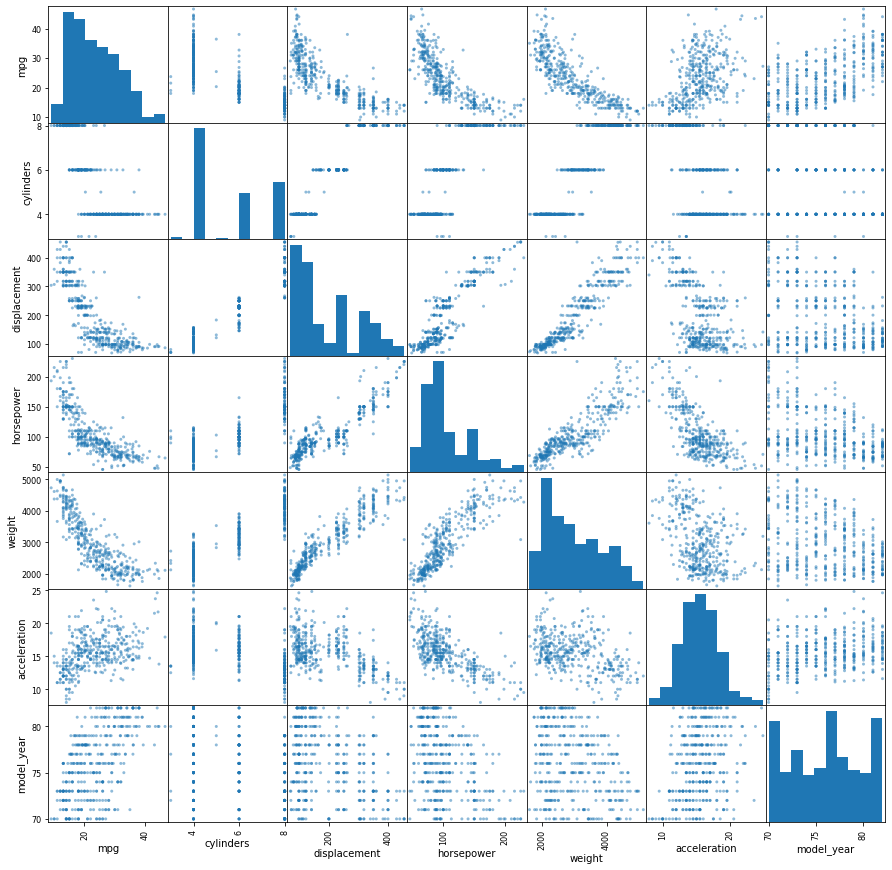

In [13]:
from pandas.plotting import scatter_matrix

scatter_matrix(features, figsize = (15, 15))

## `seaborn.heatmap()`

- Seaborn colormaps use **HSL<sub>uv</sub>**
- HSL<sub>uv</sub> is a human-friendly

[Text(0.5, 0, 'mpg'),
 Text(1.5, 0, 'cylinders'),
 Text(2.5, 0, 'displacement'),
 Text(3.5, 0, 'horsepower'),
 Text(4.5, 0, 'weight'),
 Text(5.5, 0, 'acceleration'),
 Text(6.5, 0, 'model_year')]

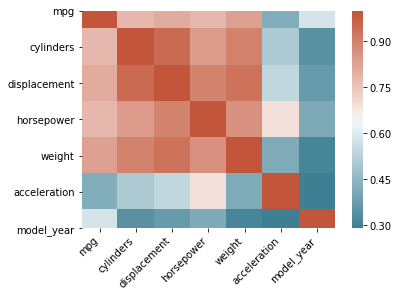

In [18]:
ax = sns.heatmap(
    corr_matrix, #data
    
    # Color map (HSLuv)
    
    cmap = sns.diverging_palette(
        220, #Anchor hue (negative)
        20, #Anchor hue (positive)
        n = 360 #Number of colors in the pallete
    ),
    square = True,
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
)

Where do your eyes jump first when you look at the chart?

What's the strongest and whats the weakest correlated pair (except the main diagonal)?

What are the three variables least correlated with `mpg`?

https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

## `np.ones`

In [19]:
np.ones((2,3)) # (rows, columns)

array([[1., 1., 1.],
       [1., 1., 1.]])

## `np.triu`

- Used to find the upper triangle of a multidimensional array
- returns a copy of a matric with the elements below the k-th diagonal zeroed

In [23]:
np.triu(np.ones(corr_matrix.shape), k = 1)

array([[0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [24]:
tri = np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool)
tri

array([[False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False]])

In [27]:
# Select upper triangle of correlation matrix

upper = corr_matrix.where(tri)

upper

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,NaN,0.777618,0.805127,0.778427,0.832244,0.423329,0.580541
cylinders,NaN,NaN,0.950823,0.842983,0.897527,0.504683,0.345647
displacement,NaN,NaN,NaN,0.897257,0.932994,0.543800,0.369855
horsepower,NaN,NaN,NaN,NaN,0.864538,0.689196,0.416361
weight,NaN,NaN,NaN,NaN,NaN,0.416839,0.309120
acceleration,NaN,NaN,NaN,NaN,NaN,NaN,0.290316
model_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Find index of feature columns with correlation greater than 90%

to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]
to_drop

['displacement', 'weight']

In [30]:
features.drop(features[to_drop], axis = 1, inplace = True)
features.head()

,mpg,cylinders,horsepower,acceleration,model_year
0,18.0,8,130.0,12.0,70
1,15.0,8,165.0,11.5,70
2,18.0,8,150.0,11.0,70
3,16.0,8,150.0,12.0,70
4,17.0,8,140.0,10.5,70


## Review: `pd.factorize()`

- Returns tuple with numeric representation of categorical data
- Useful when all that matters is identifying distinct values or groups in a single column

In [31]:
pd.factorize(mpg['origin'])

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2,
        2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 0, 2,
        2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
        0, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 1, 2, 1,
        2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 

## Review: `pd.get_dummies()`

In [32]:
pd.get_dummies(mpg['origin'])[17:20]

,europe,japan,usa
17,0,0,1
18,0,1,0
19,1,0,0


## Sigmoid Function

- Also known as "logistic function"
- Takes a real number and maps it to a value between 0 and 1
- Used in ML to convert probabilities to binary

p = 1/(1 + e ^(-y))

In [43]:
def sigmoid_Function(y):
    p = 1 / (1 + np.exp(-y))
    return p

In [47]:
df = pd.DataFrame({
    'x' : np.array([i for i in range (-10, 11)])
})

df['y'] = df['x'] * 2

df.head()

,x,y
0,-10,-20
1,-9,-18
2,-8,-16
3,-7,-14
4,-6,-12


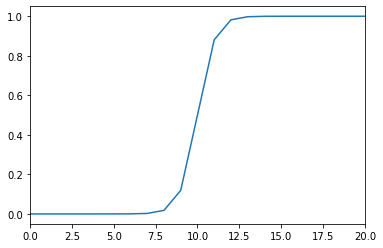

In [48]:
df['s'] = df['y'].apply(sigmoid_Function)
df['s'].plot()

## `LogisticRegression()`

- simple algorithm for binary classification
- Applies Sigmoid function to dependent variable (target) in linear model

In [52]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(
    features,
    target,
    test_size = .2,
    random_state = 42,
)

train_X.head()

,mpg,cylinders,horsepower,acceleration,model_year
258,18.6,6,110.0,18.7,78
182,25.0,4,92.0,14.9,76
172,18.0,6,97.0,14.5,75
63,15.0,8,150.0,13.5,72
340,39.0,4,64.0,16.4,81


In [53]:
from sklearn.linear_model import LogisticRegression

log_regr = LogisticRegression(solver = 'lbfgs')
log_regr.fit(train_X, train_y.values.ravel())
log_regr.score(test_X, test_y)

0.8607594936708861

# `KNeighborsClassifier`

- Using Euclidean geometry, calculates **k-nearest neighbors** for each data point(k = 5 by default)
- Assumes that similar data points are close to one another
- Pros: simple, versatile (KNN can also be used for regression!)
- Cons: slows significantly as data volume increases

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) # k = 5 by default
knn.fit(train_X, train_y.values.ravel())
knn.score(test_X, test_y)

0.7088607594936709

## `RobustScalar`

- Removes the median and scales the data according to the quantile range (default = interquartile range)

Why is it "robust"?



In [57]:
train_X[:5]

,mpg,cylinders,horsepower,acceleration,model_year
258,18.6,6,110.0,18.7,78
182,25.0,4,92.0,14.9,76
172,18.0,6,97.0,14.5,75
63,15.0,8,150.0,13.5,72
340,39.0,4,64.0,16.4,81


In [58]:
from sklearn.preprocessing import RobustScaler

scalar = RobustScaler().fit(train_X)
scalar.transform(train_X)[:5]

array([[-0.33846154,  0.5       ,  0.28301887,  0.84210526,  0.33333333],
       [ 0.15384615,  0.        , -0.05660377, -0.15789474,  0.        ],
       [-0.38461538,  0.5       ,  0.03773585, -0.26315789, -0.16666667],
       [-0.61538462,  1.        ,  1.03773585, -0.52631579, -0.66666667],
       [ 1.23076923,  0.        , -0.58490566,  0.23684211,  0.83333333]])

In [59]:
knn_robust = KNeighborsClassifier()
knn_robust.fit(scalar.transform(train_X), train_y.values.ravel())
knn_robust.score(scalar.transform(test_X), test_y)

0.810126582278481